In [1]:
import torch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
torch.cuda.is_available()

True

In [4]:
df = pd.read_csv('mnist_train_small.csv', header=None)
df_test = pd.read_csv('mnist_test.csv', header=None)

In [5]:
print(df.shape)
print(df_test.shape)

(20000, 785)
(10000, 785)


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pic = np.array(df.iloc[15][1:].values, dtype=np.int32)
target = df.iloc[15][0]

In [8]:
pic.shape = (28, 28)

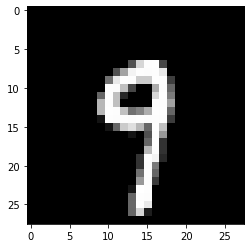

In [9]:
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)

In [10]:
X_train = df[df.columns[1:]].values
X_train = X_train / 255.

X_test = df_test[df_test.columns[1:]].values
X_test = X_test / 255.

In [11]:
train_data = torch.from_numpy(X_train)
train_labels = torch.from_numpy(df[0].values).view(-1, 1)

test_data = torch.from_numpy(X_test)
test_labels = torch.from_numpy(df_test[0].values).view(-1, 1)

In [12]:
print(train_labels.shape)
print(train_data.shape)
print(test_labels.shape)
print(test_data.shape)

torch.Size([20000, 1])
torch.Size([20000, 784])
torch.Size([10000, 1])
torch.Size([10000, 784])


In [13]:
from torch import nn

In [14]:
# nn.Linear() - линейный слой
# nn.ReLU
num_features = train_data.shape[1]
hidden_units = 64
num_classes = 10

model = nn.Sequential(
    nn.Linear(num_features, 64),
    nn.ReLU(),
    nn.Linear(64, num_classes),
)

# model = nn.Sequential()
# model.add_module('0', nn.Linear())
# model.add_

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-2)

In [16]:
num_iterations = 1000
train_data = train_data.to(device)
train_labels = train_labels.to(device).view(-1)
cost_rms = []
for i in range(num_iterations):

    # forward step
    preds = model(train_data.float())

    # compute cost
    loss = criterion(preds, train_labels)
    cost_rms.append(loss.item())

    # optimization
    # calc gradients
    
    optimizer.zero_grad() # обнуляет градиенты 
    loss.backward() # считает все градиенты

    optimizer.step() # обновляем параметры с учетом производных (делаем шаг градиентного спуска / иного метода оптимизации )

    print(f'loss {i}: {cost_rms[-1]}')

loss 0: 2.3026041984558105
loss 1: 6.267426490783691
loss 2: 13.087467193603516
loss 3: 15.066062927246094
loss 4: 12.452896118164062
loss 5: 4.0674333572387695
loss 6: 2.0769689083099365
loss 7: 1.1238270998001099
loss 8: 0.9630988240242004
loss 9: 0.8624396324157715
loss 10: 0.7808820605278015
loss 11: 0.7097270488739014
loss 12: 0.6552581191062927
loss 13: 0.6147432327270508
loss 14: 0.5802755355834961
loss 15: 0.5726724863052368
loss 16: 0.5735955834388733
loss 17: 0.5243776440620422
loss 18: 0.5042392611503601
loss 19: 0.4861322343349457
loss 20: 0.4714744985103607
loss 21: 0.4563497006893158
loss 22: 0.4449014663696289
loss 23: 0.44012323021888733
loss 24: 0.4254525303840637
loss 25: 0.41309720277786255
loss 26: 0.4129343330860138
loss 27: 0.3962920010089874
loss 28: 0.3918866217136383
loss 29: 0.38235658407211304
loss 30: 0.38861653208732605
loss 31: 0.3640596568584442
loss 32: 0.3500140607357025
loss 33: 0.3402037024497986
loss 34: 0.3343510627746582
loss 35: 0.3346062600612640

loss 282: 0.06886397302150726
loss 283: 0.06962116062641144
loss 284: 0.06964646279811859
loss 285: 0.07175041735172272
loss 286: 0.07170615345239639
loss 287: 0.0757950097322464
loss 288: 0.07591292262077332
loss 289: 0.08396245539188385
loss 290: 0.0869688019156456
loss 291: 0.11193106323480606
loss 292: 0.14558154344558716
loss 293: 0.3940138518810272
loss 294: 0.8292232155799866
loss 295: 1.2842012643814087
loss 296: 0.669712245464325
loss 297: 0.30256161093711853
loss 298: 0.1571357101202011
loss 299: 0.10737456381320953
loss 300: 0.10005989670753479
loss 301: 0.0953805148601532
loss 302: 0.09166410565376282
loss 303: 0.0885692611336708
loss 304: 0.08589485287666321
loss 305: 0.08358914405107498
loss 306: 0.08153610676527023
loss 307: 0.07971449196338654
loss 308: 0.07804698497056961
loss 309: 0.07657863944768906
loss 310: 0.07526542246341705
loss 311: 0.07406330853700638
loss 312: 0.07294394075870514
loss 313: 0.07192324101924896
loss 314: 0.07099172472953796
loss 315: 0.07011304

loss 557: 0.02053128369152546
loss 558: 0.02041240781545639
loss 559: 0.020305737853050232
loss 560: 0.020212678238749504
loss 561: 0.020119575783610344
loss 562: 0.01999603770673275
loss 563: 0.01991254836320877
loss 564: 0.019813938066363335
loss 565: 0.01974356546998024
loss 566: 0.01968960464000702
loss 567: 0.019625645130872726
loss 568: 0.019556716084480286
loss 569: 0.019524671137332916
loss 570: 0.01955496147274971
loss 571: 0.019561180844902992
loss 572: 0.01952468790113926
loss 573: 0.019610093906521797
loss 574: 0.0197613425552845
loss 575: 0.020002834498882294
loss 576: 0.020306607708334923
loss 577: 0.021057430654764175
loss 578: 0.02248646877706051
loss 579: 0.026285000145435333
loss 580: 0.038408223539590836
loss 581: 0.11899527907371521
loss 582: 0.8399933576583862
loss 583: 2.3814704418182373
loss 584: 1.9587576389312744
loss 585: 0.3699668049812317
loss 586: 0.19081240892410278
loss 587: 0.11845201253890991
loss 588: 0.09694003313779831
loss 589: 0.07589905709028244
l

loss 824: 0.006672079674899578
loss 825: 0.006621574517339468
loss 826: 0.006577625870704651
loss 827: 0.006536885630339384
loss 828: 0.006494265049695969
loss 829: 0.00645506801083684
loss 830: 0.00641279062256217
loss 831: 0.006369495298713446
loss 832: 0.006328825373202562
loss 833: 0.006289243698120117
loss 834: 0.006248492281883955
loss 835: 0.006211419124156237
loss 836: 0.006166921462863684
loss 837: 0.006131650414317846
loss 838: 0.006097921635955572
loss 839: 0.006056605372577906
loss 840: 0.0060146101750433445
loss 841: 0.005980669055134058
loss 842: 0.005944555159658194
loss 843: 0.005911600310355425
loss 844: 0.00586781045421958
loss 845: 0.005834702402353287
loss 846: 0.005807556677609682
loss 847: 0.005778240505605936
loss 848: 0.005733723286539316
loss 849: 0.005702710244804621
loss 850: 0.005662098992615938
loss 851: 0.0056307935155928135
loss 852: 0.005588104948401451
loss 853: 0.005555911920964718
loss 854: 0.005513625685125589
loss 855: 0.005482102744281292
loss 856: